# Experiment 1: Getting started with MIKE IO.

Main takeaways:
* The data is accessible.
* The data can be plotted correctly.
* The first 48 observation may be discarded as a warmup period of the simulation.

## Imports

In [11]:
%matplotlib notebook

In [12]:
# Import packages:
import mikeio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os
import sys

sys.path.append("../")
plt.style.use("seaborn-v0_8-whitegrid")

from Scripts import my_functions as mf

from sklearn.decomposition import PCA
from IPython.display import HTML
from tqdm import tqdm



## Data Extraction

In [25]:
## Find the relative path to Data/DHI_wk_sim/Area.dfsu from current directory:

# Go up two levels from current directory:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

# Overwrite path:
path = os.path.join(path, "Data/DHI_wk_sim/Area.dfsu")

# Get first and last time step:
time = mikeio.open(path).time

# Load data:
data = mikeio.read(path,
                   time=slice(time[0], time[-1]))

In [57]:
data.Surface_elevation[10]

<mikeio.DataArray>
name: Surface elevation
dims: (element:17980)
time: 1996-12-18 05:00:00 (time-invariant)
geometry: Dfsu2D (17980 elements, 10460 nodes)
values: [0.02122, 0.06288, ..., 0.05854]

## Plots

<IPython.core.display.Javascript object>


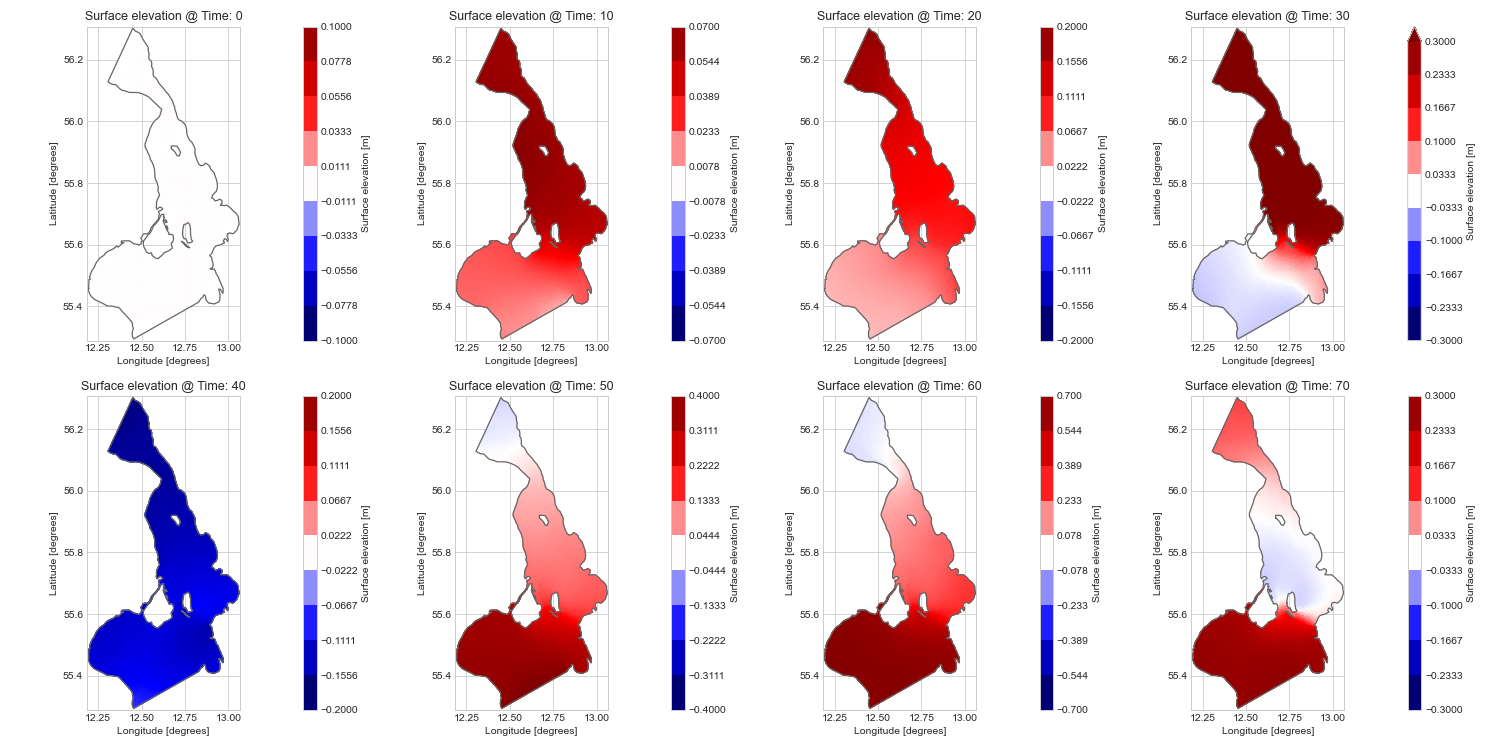

In [59]:
# Plot the data
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, ax in enumerate(axs.flatten()):
    
    plot_obj = data.Surface_elevation[int(i*10)]
    
    cmap_max = np.quantile(np.abs(plot_obj.values), 0.99)
    digits = np.sum([cmap_max * (10**i) < 1 for i in range(5)])
    cmap_max = np.round(cmap_max, digits)
   
    plot_obj.plot(ax=ax, cmap="seismic",
                  vmin=-cmap_max, vmax=cmap_max)
    ax.set_title(f"Surface elevation @ Time: {plot_times[i]}")

plt.tight_layout()
plt.show()


In [60]:
fig.savefig("../Figures/Exp_1_Surface_elevations.png", dpi=100)